# 데이터준비

In [169]:
# 라이브러리 관리
import os
import os.path as path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import joblib
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV

plt.rcParams['font.family'] = 'Malgun Gothic' # 윈도우 이용자
# plt.rcParams['font.family'] = 'AppleGothic' # Mac 이용자
plt.rcParams['axes.unicode_minus'] = False

In [28]:

# 태양광 발전량(kwh)
target_path = path.join('.', 'dataset', "태양광발전량") 

elec_gen_sun_df = None
df_list = []
for filename in os.listdir(target_path):    
    filepath = path.join(target_path, filename)
    try :
        temp = pd.read_csv(filepath, encoding="utf8")
        print(temp.shape)
        temp.columns = ['일시', '교래태양광', '종합경기장 태양광', '행원태양광', '홍보관주차장 태양광', '수산태양광', '태양광전체']
        df_list.append(temp)
    except UnicodeDecodeError:
        temp = pd.read_csv(filepath, encoding="cp949")
        print(temp.shape)
        df_list.append(temp)
        
df = pd.concat(df_list, axis=0, ignore_index=True)
    
elec_gen_sun_df = df.iloc[:, [0, -2]]
elec_gen_sun_df.columns = ["일시", "발전량"]

# 데이터 타입 확인
print(elec_gen_sun_df.info())
# 결측값 확인
print(elec_gen_sun_df.isnull().sum())

(90, 7)
(91, 7)
(92, 7)
(92, 7)
(91, 7)
(91, 7)
(92, 7)
(92, 7)
(90, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 821 entries, 0 to 820
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   일시      821 non-null    object 
 1   발전량     821 non-null    float64
dtypes: float64(1), object(1)
memory usage: 13.0+ KB
None
일시     0
발전량    0
dtype: int64


In [29]:
# 풍력발전량(kwh)
target_path = path.join('.', 'dataset', "풍력발전량") 

elec_gen_wind_df = None
df_list = []
for filename in os.listdir(target_path):    
    filepath = path.join(target_path, filename)
    try :
        temp = pd.read_csv(filepath, encoding="utf8")
        df_list.append(temp)
    except UnicodeDecodeError:
        temp = pd.read_csv(filepath, encoding="cp949")
        df_list.append(temp)
        
df = pd.concat(df_list, axis=0)
    
elec_gen_wind_df = df.iloc[:, [0, -1]]
elec_gen_wind_df.columns = ["일시", "발전량"]
elec_gen_wind_df.reset_index(drop=True, inplace=True)

elec_gen_wind_df.dropna(inplace=True)
elec_gen_wind_df[["발전량"]] = elec_gen_wind_df[["발전량"]].astype(float)

print(elec_gen_wind_df.head())

# 데이터 타입 확인
print(elec_gen_wind_df.info())
# 결측값 확인
print(elec_gen_wind_df.isnull().sum())

           일시         발전량
0  2023-01-01  423450.154
1  2023-01-02  600504.576
2  2023-01-03  574276.736
3  2023-01-04  197721.002
4  2023-01-05   57986.543
<class 'pandas.core.frame.DataFrame'>
Index: 851 entries, 0 to 852
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   일시      851 non-null    object 
 1   발전량     851 non-null    float64
dtypes: float64(1), object(1)
memory usage: 19.9+ KB
None
일시     0
발전량    0
dtype: int64


C:\Users\human-03\AppData\Local\Temp\ipykernel_8568\149130609.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elec_gen_wind_df.dropna(inplace=True)
C:\Users\human-03\AppData\Local\Temp\ipykernel_8568\149130609.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elec_gen_wind_df[["발전량"]] = elec_gen_wind_df[["발전량"]].astype(float)


In [30]:
# 날씨 데이터 2015년~2025년
df_temp = pd.read_csv("dataset/기온데이터.csv", encoding="cp949")
df_sun = pd.read_csv("dataset/일조량데이터.csv", encoding="cp949")
df_wind = pd.read_csv("dataset/풍속데이터.csv", encoding="cp949")
df_rain = pd.read_csv("dataset/강수량데이터.csv", encoding='cp949')
df_hum = pd.read_csv("dataset/습도데이터.csv", encoding='utf8')

# 풍향풍속데이터 전처리
# 필요없는 컬럼 제거
df_wind = df_wind.iloc[:, :4]

# 강수량 데이터 결측치 0으로 채워놓기
df_rain.fillna(0, inplace=True)

# 각 데이터 프레임 컬럼명 변경
df_temp.columns = ['일시', '평균기온', '최고기온', '최저기온']
df_sun.columns = ['일시', '일조합', '일조율', '일사합']
df_wind.columns = ['일시', '평균풍속', '최대풍속', '최대풍속풍향']
df_rain.columns = ['일시', '강수량']
df_hum.columns = ["일시", "평균습도", "최저습도"]

# 일시 컬럼 삭제
print(df_temp.info())
df_temp = df_temp[['일시', '평균기온', '최고기온', '최저기온']]
df_sun = df_sun.iloc[:, 1:]
df_wind = df_wind.iloc[:, 1:]
df_rain = df_rain.iloc[:, 1:]
df_hum = df_hum.iloc[:, 1:]

# 합치기
df_weather = pd.concat([df_temp, df_sun, df_wind, df_rain, df_hum], axis=1)
print(df_weather)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3862 entries, 0 to 3861
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   일시      3862 non-null   object 
 1   평균기온    3859 non-null   float64
 2   최고기온    3862 non-null   float64
 3   최저기온    3862 non-null   float64
dtypes: float64(3), object(1)
memory usage: 120.8+ KB
None
              일시  평균기온  최고기온  최저기온   일조합   일조율    일사합  평균풍속  최대풍속  최대풍속풍향  \
0     2015-01-01   3.3   5.4   1.7   0.2   2.0   3.35   8.3  12.9   320.0   
1     2015-01-02   6.1   8.5   3.9   1.5  15.0   4.98   6.3   9.7   290.0   
2     2015-01-03   6.8   9.6   3.5   4.5  45.0   8.18   2.1   3.7   290.0   
3     2015-01-04  11.5  15.0   7.7   8.4  84.0  10.06   2.8   4.3   250.0   
4     2015-01-05  12.9  17.5   6.8   3.6  36.0   7.48   2.2   7.2   200.0   
...          ...   ...   ...   ...   ...   ...    ...   ...   ...     ...   
3858  2025-07-25  28.8  31.9  26.9   9.3  66.4  23.87   3.9   7.0    70.0 

In [37]:
# 데이터 합치기
## 날씨 + 태양광
df_sun = pd.merge(df_weather, elec_gen_sun_df, left_on="일시", right_on="일시", how='inner')

df_wind = pd.merge(df_weather, elec_gen_wind_df, left_on="일시", right_on="일시", how='inner')

# 데이터 전처리
df_sun["발전량"] = (df_sun["발전량"] / 1000).round(2)
df_wind["발전량"] = (df_wind["발전량"] / 1000).round(2)

# 데이터 확인
print(df_sun)
print(df_wind)

df_sun.dropna(inplace=True)
df_wind.dropna(inplace=True)

             일시  평균기온  최고기온  최저기온  일조합   일조율    일사합  평균풍속  최대풍속  최대풍속풍향  강수량  \
0    2023-01-01   8.1  10.9   5.2  1.7  17.2   5.02   3.8   5.3   320.0  0.0   
1    2023-01-02   5.2   7.8   3.7  3.2  32.3   6.42   4.3   6.3   340.0  0.0   
2    2023-01-03   6.2   8.5   4.5  1.9  19.2   5.70   4.6   6.2   320.0  0.0   
3    2023-01-04   6.2   9.9   4.1  7.6  76.8  10.91   2.7   5.5   340.0  0.0   
4    2023-01-05   8.0  13.4   4.2  5.1  51.0   8.02   2.6   4.4   290.0  0.0   
..          ...   ...   ...   ...  ...   ...    ...   ...   ...     ...  ...   
816  2025-03-27  16.3  25.2   9.0  0.8   6.5   4.15   4.1   9.6   250.0  4.7   
817  2025-03-28   8.4  10.8   7.3  3.6  29.0  14.49   4.5   6.3   320.0  0.9   
818  2025-03-29   7.7  10.9   5.4  3.3  26.6  13.64   4.2   7.2   320.0  0.0   
819  2025-03-30   6.9  10.0   4.4  8.2  65.6  20.53   3.7   6.6    20.0  0.0   
820  2025-03-31   9.1  13.1   4.8  8.6  68.8  21.04   2.4   3.9   360.0  0.0   

     평균습도  최저습도    발전량  
0    61.0  45.

# 데이터 시각화

<Axes: >

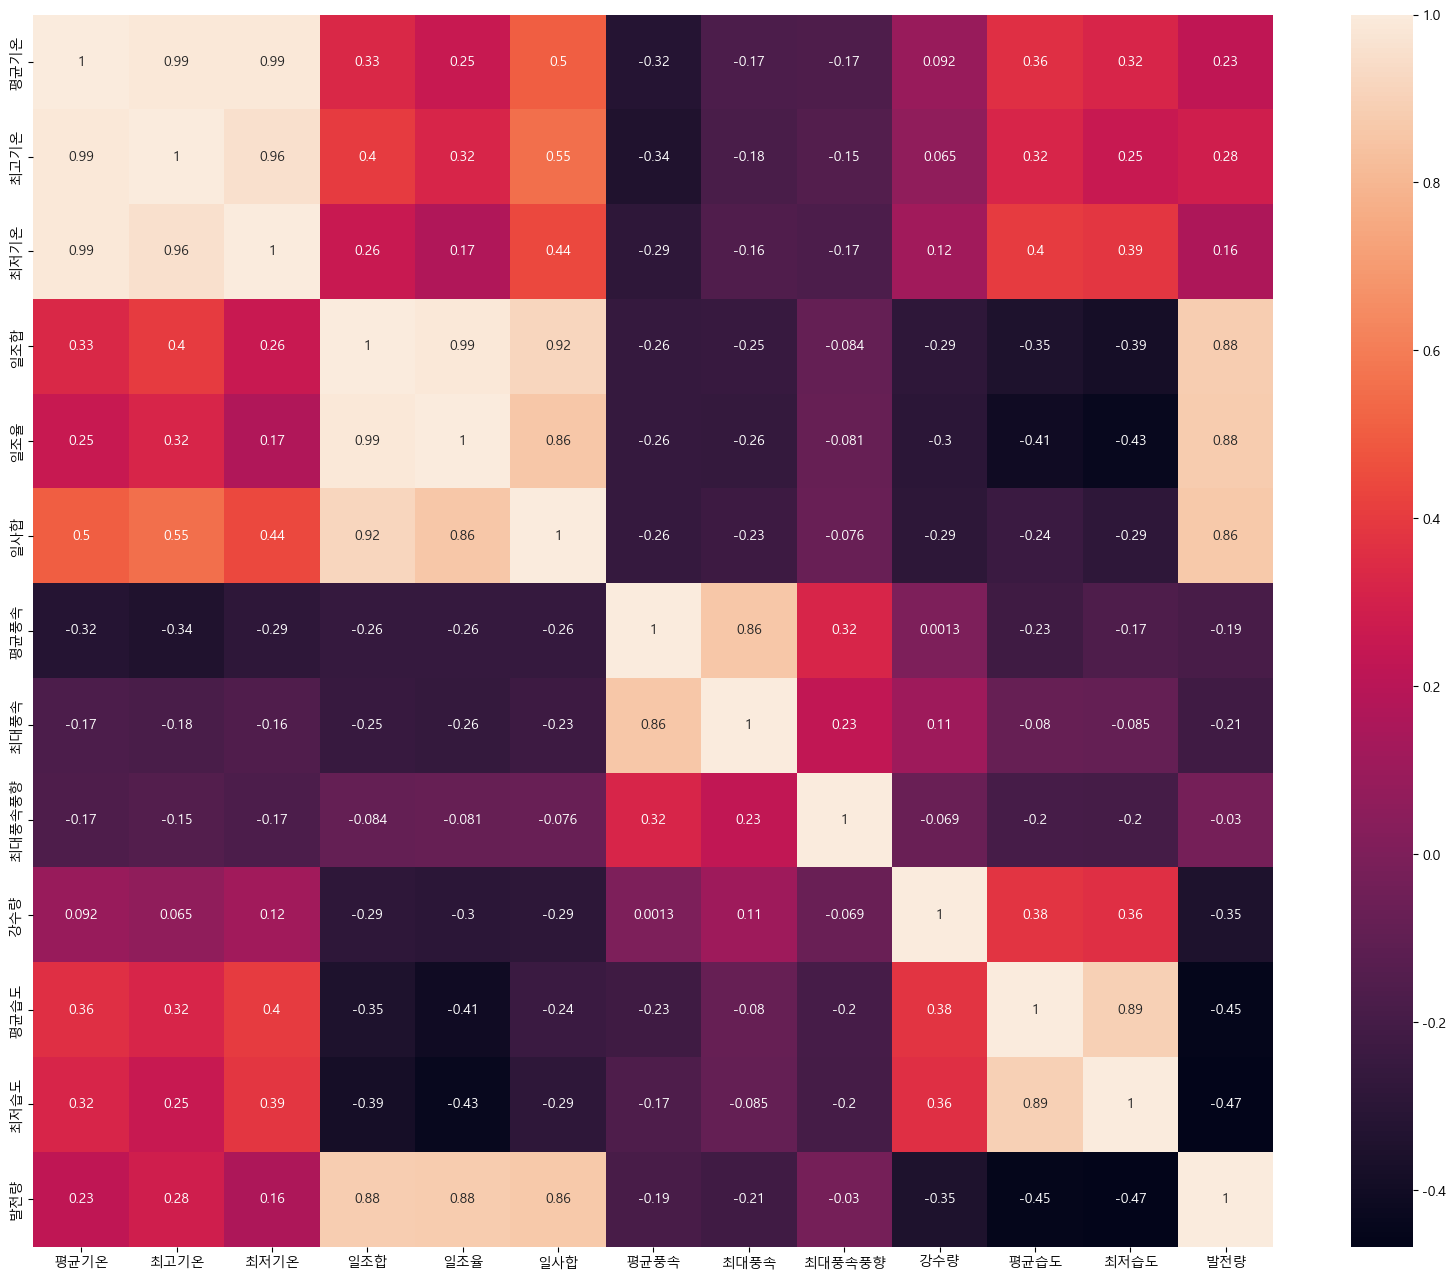

In [52]:
# 날씨 + 태양광 발전량
plt.figure(figsize=(20, 16))
sns.heatmap(df_sun.iloc[:, 1:].corr(), annot=True)

array([[<Axes: title={'center': '평균기온'}>,
        <Axes: title={'center': '최고기온'}>,
        <Axes: title={'center': '최저기온'}>,
        <Axes: title={'center': '일조합'}>],
       [<Axes: title={'center': '일조율'}>, <Axes: title={'center': '일사합'}>,
        <Axes: title={'center': '평균풍속'}>,
        <Axes: title={'center': '최대풍속'}>],
       [<Axes: title={'center': '최대풍속풍향'}>,
        <Axes: title={'center': '강수량'}>,
        <Axes: title={'center': '평균습도'}>,
        <Axes: title={'center': '최저습도'}>],
       [<Axes: title={'center': '발전량'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

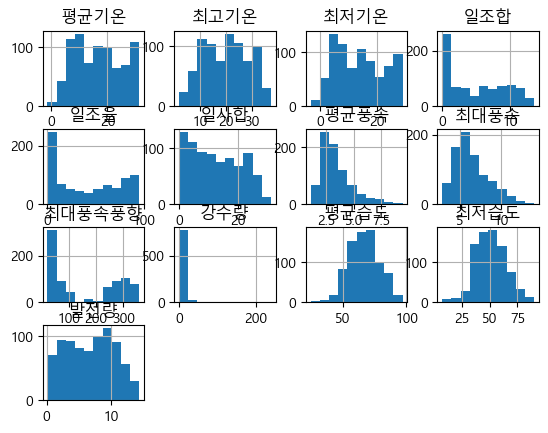

In [55]:
df_sun.hist()

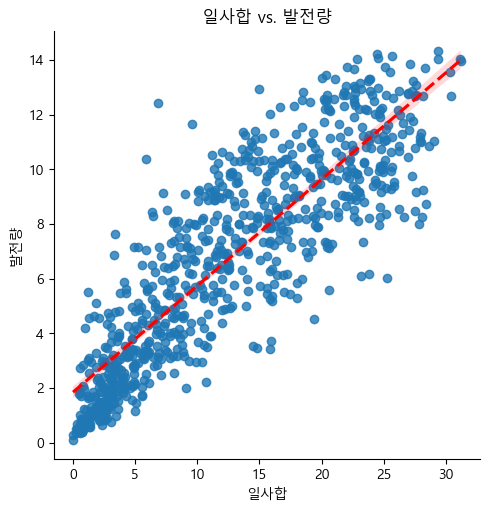

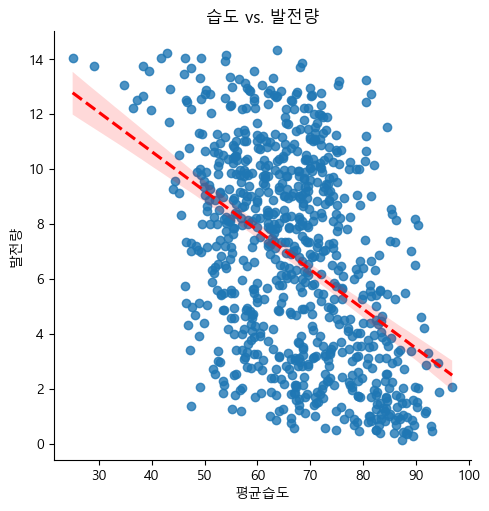

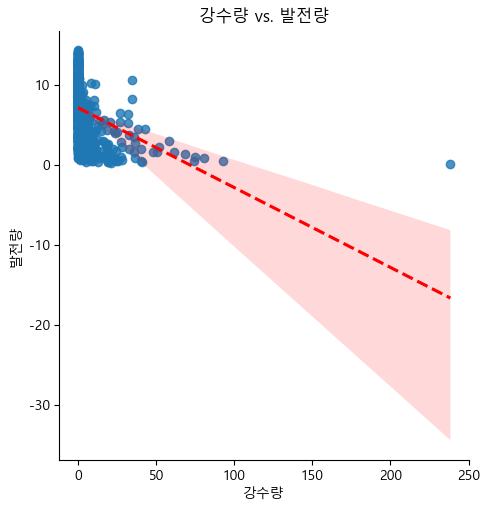

In [143]:
# 날씨 + 태양광 발전량 분산도

## 일사합 vs. 발전량
sns.lmplot(df_sun, x="일사합", y="발전량", fit_reg=True, line_kws={'color':'red', "linestyle":'--'})
plt.title("일사합 vs. 발전량")
plt.show()

## 습도 vs. 발전량
sns.lmplot(df_sun, x="평균습도", y="발전량", fit_reg=True, line_kws={'color':'red', "linestyle":'--'})
plt.title("습도 vs. 발전량")
plt.show()

## 강수량 vs. 발전량
sns.lmplot(df_sun, x="강수량", y="발전량", fit_reg=True, line_kws={'color':'red', "linestyle":'--'})
plt.title("강수량 vs. 발전량")
plt.show()

array([[<Axes: title={'center': '평균기온'}>,
        <Axes: title={'center': '최고기온'}>,
        <Axes: title={'center': '최저기온'}>,
        <Axes: title={'center': '일조합'}>],
       [<Axes: title={'center': '일조율'}>, <Axes: title={'center': '일사합'}>,
        <Axes: title={'center': '평균풍속'}>,
        <Axes: title={'center': '최대풍속'}>],
       [<Axes: title={'center': '최대풍속풍향'}>,
        <Axes: title={'center': '강수량'}>,
        <Axes: title={'center': '평균습도'}>,
        <Axes: title={'center': '최저습도'}>],
       [<Axes: title={'center': '발전량'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

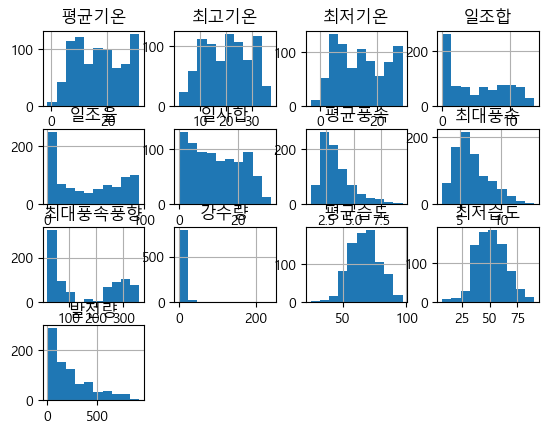

In [112]:
df_wind.hist()

<Axes: >

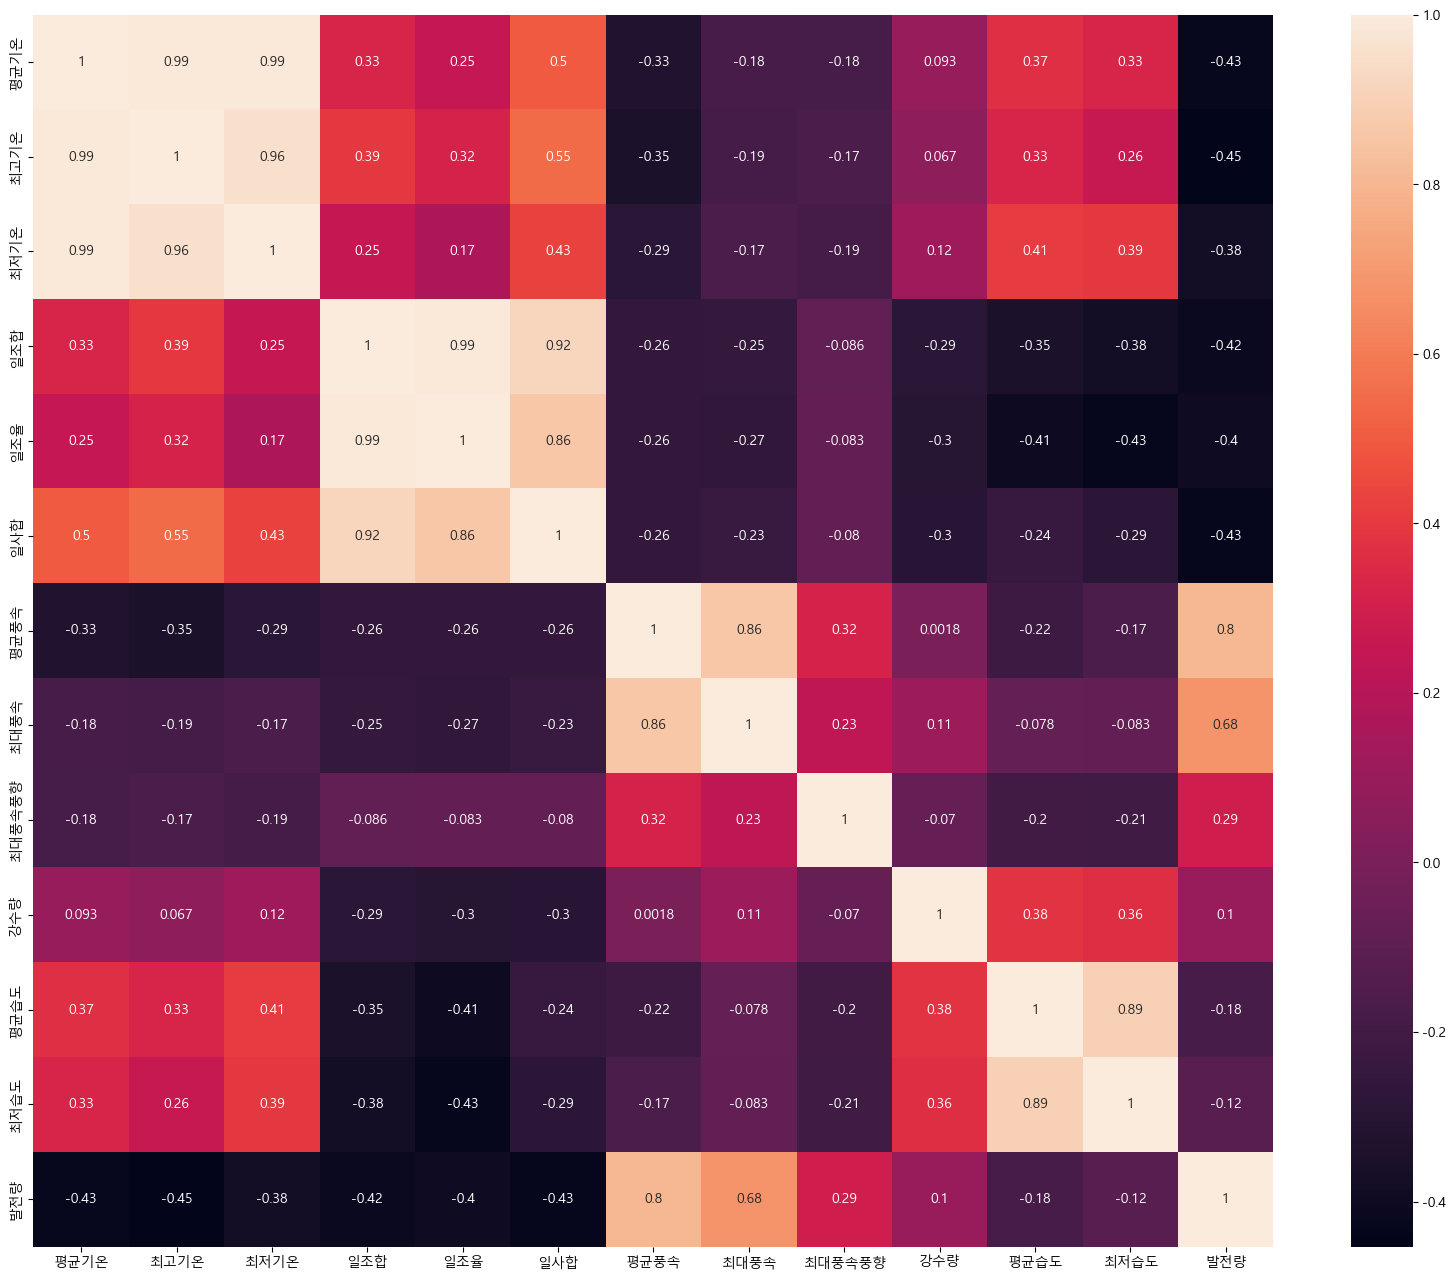

In [44]:
# 날씨 + 태양광 발전량
plt.figure(figsize=(20, 16))
sns.heatmap(df_wind.iloc[:, 1:].corr(), annot=True)

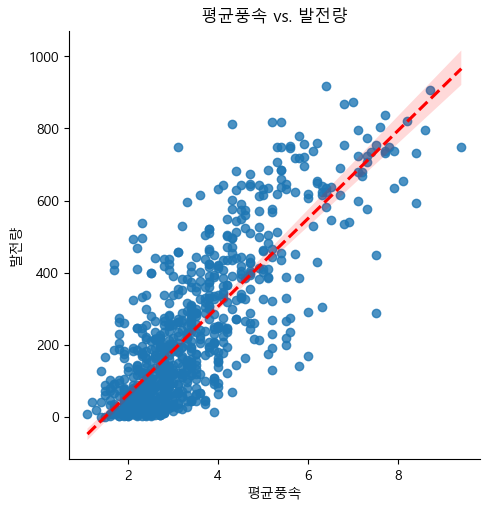

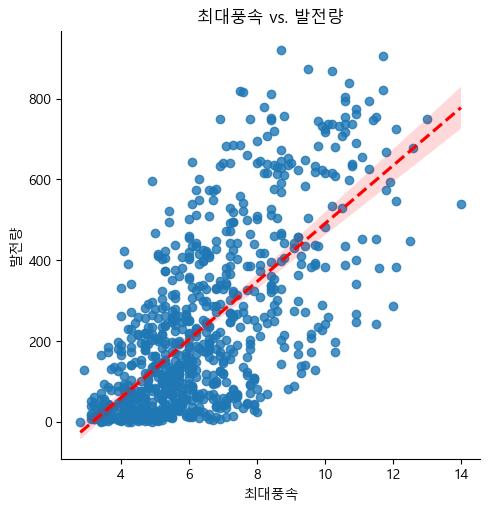

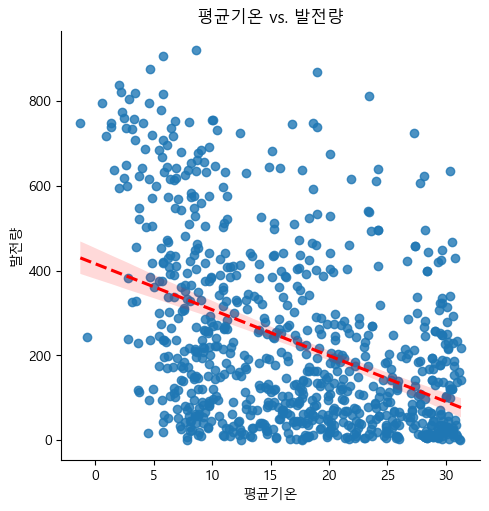

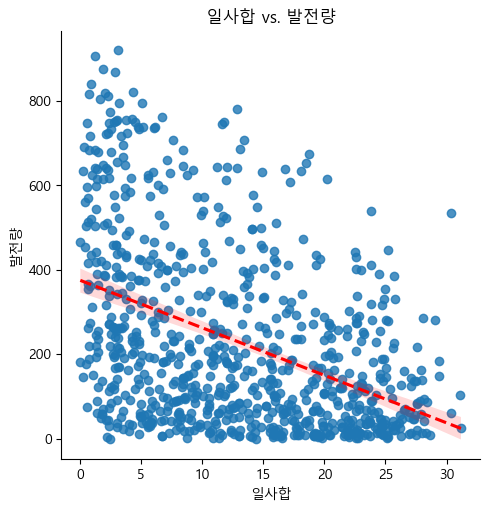

In [148]:
# 날씨 + 풍력 발전량 분산도

## 평균풍속 vs. 발전량
sns.lmplot(df_wind, x="평균풍속", y="발전량", fit_reg=True, line_kws={'color':'red', "linestyle":'--'})
plt.title("평균풍속 vs. 발전량")
plt.show()

## 최대풍속 vs. 발전량
sns.lmplot(df_wind, x="최대풍속", y="발전량", fit_reg=True, line_kws={'color':'red', "linestyle":'--'})
plt.title("최대풍속 vs. 발전량")
plt.show()

## 평균기온 vs. 발전량
sns.lmplot(df_wind, x="평균기온", y="발전량", fit_reg=True, line_kws={'color':'red', "linestyle":'--'})
plt.title("평균기온 vs. 발전량")
plt.show()

## 일사합 vs. 발전량
sns.lmplot(df_wind, x="일사합", y="발전량", fit_reg=True, line_kws={'color':'red', "linestyle":'--'})
plt.title("일사합 vs. 발전량")
plt.show()

# 머신러닝 예측 모델 ( 랜덤 포레스트 )

In [172]:
# 태양광 발전량 예측
selected_columns = ["일사합", "평균습도", "강수량", "평균기온"]
X_sun = df_sun[selected_columns].values.reshape(-1, len(selected_columns))
y_sun = df_sun["발전량"].values

X_sun_train, X_sun_test, y_sun_train, y_sun_test = train_test_split(X_sun, y_sun, test_size=0.2, random_state=42)
model_sun_gen_filename = "model_sun_gen.pkl"
model_sun_gen = None
try :
    model_sun_gen = joblib.load(model_sun_gen_filename)
except FileNotFoundError:
    param_grid={
        "n_estimators": [100, 200, 400],
        "max_depth": [2, 4, 8],
        "min_samples_split": [2, 5, 10]
    }
    grid = GridSearchCV(estimator=RandomForestRegressor(random_state=42), cv=3, scoring='r2', param_grid=param_grid)
    grid.fit(X_sun_train, y_sun_train)

    model_sun_gen = grid.best_estimator_
    joblib.dump(model_sun_gen, model_sun_gen_filename)

In [173]:
# 모델 평가
y_sun_pred = model_sun_gen.predict(X_sun_test)

print(f"R2 Score: {r2_score(y_sun_test, y_sun_pred)}")
print(f"MSE: {mean_squared_error(y_sun_test, y_sun_pred)}")
print(f"RMSE: {root_mean_squared_error(y_sun_test, y_sun_pred)}")
print(f"MAE: {mean_absolute_error(y_sun_test, y_sun_pred)}")

R2 Score: 0.8225522229341633
MSE: 2.3875561163519032
RMSE: 1.5451718727545825
MAE: 1.2187982740580408


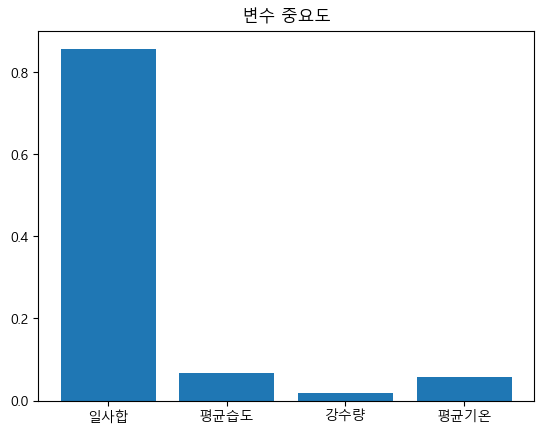

In [132]:
# 최적 파라미터 시각화
plt.title("변수 중요도")
plt.bar(selected_columns, model_sun_gen.feature_importances_)
plt.show()


In [170]:
# 풍력 발전량 예측
selected_columns = ["평균풍속", "일사합", "최고기온", "최저기온"]
X_wind = df_wind[selected_columns].values.reshape(-1, len(selected_columns))
y_wind = df_wind["발전량"].values

X_wind_train, X_wind_test, y_wind_train, y_wind_test = train_test_split(X_wind, y_wind, test_size=0.2, random_state=42)
model_wind_gen_filename = "model_wind_gen.pkl"
model_wind_gen = None
try :
    model_wind_gen = joblib.load(model_wind_gen_filename)
except FileNotFoundError:
    param_grid={
        "n_estimators": [100, 200, 400],
        "max_depth": [2, 4, 8],
        "min_samples_split": [2, 5, 10]
    }
    grid = GridSearchCV(estimator=RandomForestRegressor(random_state=42), cv=3, scoring='r2', param_grid=param_grid)
    grid.fit(X_wind_train, y_wind_train)

    model_wind_gen = grid.best_estimator_
    joblib.dump(model_wind_gen, model_wind_gen_filename)


In [174]:
# 모델 평가
y_wind_pred = model_wind_gen.predict(X_wind_test)

print(f"R2 Score: {r2_score(y_wind_test, y_wind_pred)}")
print(f"MSE: {mean_squared_error(y_wind_test, y_wind_pred)}")
print(f"RMSE: {root_mean_squared_error(y_wind_test, y_wind_pred)}")
print(f"MAE: {mean_absolute_error(y_wind_test, y_wind_pred)}")

R2 Score: 0.7759983236006576
MSE: 9504.577552303394
RMSE: 97.49142296788673
MAE: 77.98829512404448


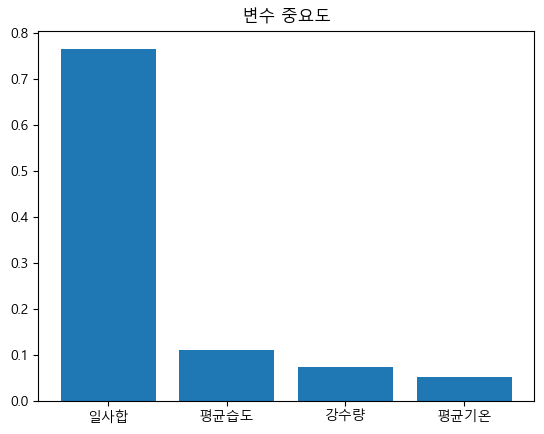

In [175]:
# 최적 파라미터 시각화
plt.title("변수 중요도")
plt.bar(selected_columns, model_wind_gen.feature_importances_)
plt.show()